# Project Overview

This project analyzes pharmaceutical spending data obtained from the Organisation for Economic Co-operation and Development (OECD). The goal is to understand trends in pharmaceutical spending across various countries and to prepare the dataset for further analysis and modeling.


## Data Sources

The data comes from the following sources:
- **Pharmaceutical Spending Data**: [OECD](https://data.oecd.org/healthres/pharmaceutical-spending.htm)
- **Population Data**: [DataHub](http://datahub.io/core/population)

Additional details about the data fields:
- **LOCATION**: Country code
- **TIME**: Year of the data
- **PC_HEALTHXP**: Percent of health spending
- **PC_GDP**: Percent of GDP
- **USD_CAP**: US dollars per capita
- **FLAG_CODES**: Additional metadata flags
- **TOTAL_SPEND**: Total pharmaceutical spending


# 1. Load the Dataset

In [42]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [43]:
import warnings

# Suppress only FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [44]:
# Specify the path to the CSV file
file_path = 'data/raw/flat-ui__data-Fri Oct 18 2024.csv'

# Load the raw dataset
raw_df = pd.read_csv('../data/raw/flat-ui__data-Fri Oct 18 2024.csv')

# Save the original raw dataset to a standard location
raw_df.to_csv('../data/raw/raw_dataset.csv', index=False)

# Display the first few rows of the DataFrame
raw_df.head()

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND
0,AUS,1971,15.992,0.727,35.720,NaN,462.11
1,AUS,1972,15.091,0.686,36.056,NaN,475.11
2,AUS,1973,15.117,0.681,39.871,NaN,533.47
3,AUS,1974,14.771,0.755,47.559,NaN,652.65
4,AUS,1975,11.849,0.682,47.561,NaN,660.76


In [45]:
print("Raw dataset columns:")
print(processed_df.columns)

Raw dataset columns:
Index(['LOCATION', 'TIME', 'PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'FLAG_CODES',
       'TOTAL_SPEND'],
      dtype='object')


# 2. Preprocess the Data

In [46]:
# Create a copy of the raw dataset to preserve original data
processed_df = raw_df.copy()

# Fill missing values in FLAG_CODES column with 'Unknown'
processed_df['FLAG_CODES'] = processed_df['FLAG_CODES'].fillna('Unknown')

# Convert data types for consistency
processed_df['LOCATION'] = processed_df['LOCATION'].astype(str)
processed_df['TIME'] = processed_df['TIME'].astype(int)
processed_df['PC_HEALTHXP'] = processed_df['PC_HEALTHXP'].astype(float)
processed_df['PC_GDP'] = processed_df['PC_GDP'].astype(float)
processed_df['USD_CAP'] = processed_df['USD_CAP'].astype(float)
processed_df['TOTAL_SPEND'] = processed_df['TOTAL_SPEND'].astype(float)

# Save the processed dataset
processed_df.to_csv('../data/processed/processed_dataset.csv', index=False)
print("Processed dataset saved to './data/processed/processed_dataset.csv'")


Processed dataset saved to './data/processed/processed_dataset.csv'


In [47]:
preprocessor = grid_rf.best_estimator_.named_steps["preprocessing"]

try:
    feature_names = preprocessor.get_feature_names_out()
    print("Feature names after preprocessing:")
    print(feature_names)
except AttributeError:
    numerical_features = ["TIME", "PC_HEALTHXP", "PC_GDP", "USD_CAP"]
    categorical_features = ["LOCATION"]
    feature_names = numerical_features + list(
        preprocessor.named_transformers_["cat"]
        .named_steps["onehot"]
        .get_feature_names_out(categorical_features)
    )
    print("Feature names (manually constructed):")
    print(feature_names)

Feature names after preprocessing:
['num__TIME' 'num__PC_HEALTHXP' 'num__PC_GDP' 'num__USD_CAP'
 'cat__LOCATION_AUS' 'cat__LOCATION_AUT' 'cat__LOCATION_BEL'
 'cat__LOCATION_CAN' 'cat__LOCATION_CHE' 'cat__LOCATION_CZE'
 'cat__LOCATION_DEU' 'cat__LOCATION_DNK' 'cat__LOCATION_ESP'
 'cat__LOCATION_EST' 'cat__LOCATION_FIN' 'cat__LOCATION_FRA'
 'cat__LOCATION_GBR' 'cat__LOCATION_GRC' 'cat__LOCATION_HUN'
 'cat__LOCATION_IRL' 'cat__LOCATION_ISL' 'cat__LOCATION_ISR'
 'cat__LOCATION_ITA' 'cat__LOCATION_JPN' 'cat__LOCATION_KOR'
 'cat__LOCATION_LTU' 'cat__LOCATION_LUX' 'cat__LOCATION_LVA'
 'cat__LOCATION_MEX' 'cat__LOCATION_NLD' 'cat__LOCATION_NOR'
 'cat__LOCATION_NZL' 'cat__LOCATION_POL' 'cat__LOCATION_PRT'
 'cat__LOCATION_RUS' 'cat__LOCATION_SVK' 'cat__LOCATION_SVN'
 'cat__LOCATION_SWE' 'cat__LOCATION_TUR' 'cat__LOCATION_USA']


In [48]:
#  Map Feature Indices to Names
index_to_name = {i: name for i, name in enumerate(feature_names)}
print("Feature mapping (index to name):")
for idx, name in index_to_name.items():
    print(f"Feature {idx}: {name}")

Feature mapping (index to name):
Feature 0: num__TIME
Feature 1: num__PC_HEALTHXP
Feature 2: num__PC_GDP
Feature 3: num__USD_CAP
Feature 4: cat__LOCATION_AUS
Feature 5: cat__LOCATION_AUT
Feature 6: cat__LOCATION_BEL
Feature 7: cat__LOCATION_CAN
Feature 8: cat__LOCATION_CHE
Feature 9: cat__LOCATION_CZE
Feature 10: cat__LOCATION_DEU
Feature 11: cat__LOCATION_DNK
Feature 12: cat__LOCATION_ESP
Feature 13: cat__LOCATION_EST
Feature 14: cat__LOCATION_FIN
Feature 15: cat__LOCATION_FRA
Feature 16: cat__LOCATION_GBR
Feature 17: cat__LOCATION_GRC
Feature 18: cat__LOCATION_HUN
Feature 19: cat__LOCATION_IRL
Feature 20: cat__LOCATION_ISL
Feature 21: cat__LOCATION_ISR
Feature 22: cat__LOCATION_ITA
Feature 23: cat__LOCATION_JPN
Feature 24: cat__LOCATION_KOR
Feature 25: cat__LOCATION_LTU
Feature 26: cat__LOCATION_LUX
Feature 27: cat__LOCATION_LVA
Feature 28: cat__LOCATION_MEX
Feature 29: cat__LOCATION_NLD
Feature 30: cat__LOCATION_NOR
Feature 31: cat__LOCATION_NZL
Feature 32: cat__LOCATION_POL
Feature

# 3. Define Features and Target

In [49]:
# Assuming 'processed_df' is your DataFrame and 'TOTAL_SPEND' is the target variable
X = processed_df.drop(columns=["TOTAL_SPEND"])  # Features
y = processed_df["TOTAL_SPEND"]  # Target variable

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Debug: Print dataset shapes
print("Training and test data shapes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Training and test data shapes:
X_train: (828, 6), y_train: (828,)
X_test: (208, 6), y_test: (208,)


# 4. Perform Exploratory Data Analysis

In [50]:
# Display dataset information
print("Dataset Info:")
print(processed_df.info())

# Display descriptive statistics
print("Descriptive Statistics:")
print(processed_df.describe())

# Check for missing values
print("Missing Values by Column:")
print(processed_df.isna().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LOCATION     1036 non-null   object 
 1   TIME         1036 non-null   int64  
 2   PC_HEALTHXP  1036 non-null   float64
 3   PC_GDP       1036 non-null   float64
 4   USD_CAP      1036 non-null   float64
 5   FLAG_CODES   1036 non-null   object 
 6   TOTAL_SPEND  1036 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 56.8+ KB
None
Descriptive Statistics:
              TIME  PC_HEALTHXP       PC_GDP      USD_CAP    TOTAL_SPEND
count  1036.000000  1036.000000  1036.000000  1036.000000    1036.000000
mean   1996.809846    16.406307     1.170948   295.046989   11765.423118
std      12.498330     6.389064     0.465635   209.152134   34878.286123
min    1970.000000     5.545000     0.207000     3.160000       6.290000
25%    1987.000000    11.516250     0.768250 

# 5. Preprocessing Transformers

In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define numerical and categorical features
numerical_features = ["TIME", "PC_HEALTHXP", "PC_GDP", "USD_CAP"]
categorical_features = ["LOCATION"]

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# 6. Build Model Pipelines

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

# Define Ridge Regression pipeline
pipeline_ridge = Pipeline([
    ("preprocessing", preprocessor),
    ("regressor", Ridge())
])

# Define Random Forest pipeline
pipeline_rf = Pipeline([
    ("preprocessing", preprocessor),
    ("regressor", RandomForestRegressor())
])

In [53]:
# Extract the preprocessing step from the trained pipeline
preprocessor = grid_rf.best_estimator_.named_steps["preprocessing"]

# Get the feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

# Map feature indices to their corresponding names
index_to_name = {i: name for i, name in enumerate(feature_names)}

# Print the mapping for reference
for idx, name in index_to_name.items():
    print(f"Feature {idx}: {name}")


Feature 0: num__TIME
Feature 1: num__PC_HEALTHXP
Feature 2: num__PC_GDP
Feature 3: num__USD_CAP
Feature 4: cat__LOCATION_AUS
Feature 5: cat__LOCATION_AUT
Feature 6: cat__LOCATION_BEL
Feature 7: cat__LOCATION_CAN
Feature 8: cat__LOCATION_CHE
Feature 9: cat__LOCATION_CZE
Feature 10: cat__LOCATION_DEU
Feature 11: cat__LOCATION_DNK
Feature 12: cat__LOCATION_ESP
Feature 13: cat__LOCATION_EST
Feature 14: cat__LOCATION_FIN
Feature 15: cat__LOCATION_FRA
Feature 16: cat__LOCATION_GBR
Feature 17: cat__LOCATION_GRC
Feature 18: cat__LOCATION_HUN
Feature 19: cat__LOCATION_IRL
Feature 20: cat__LOCATION_ISL
Feature 21: cat__LOCATION_ISR
Feature 22: cat__LOCATION_ITA
Feature 23: cat__LOCATION_JPN
Feature 24: cat__LOCATION_KOR
Feature 25: cat__LOCATION_LTU
Feature 26: cat__LOCATION_LUX
Feature 27: cat__LOCATION_LVA
Feature 28: cat__LOCATION_MEX
Feature 29: cat__LOCATION_NLD
Feature 30: cat__LOCATION_NOR
Feature 31: cat__LOCATION_NZL
Feature 32: cat__LOCATION_POL
Feature 33: cat__LOCATION_PRT
Feature 34

# 7. Perform Hyperparameter Tuning

In [54]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grids
param_grid_ridge = {
    "regressor__alpha": [0.1, 1, 10, 100]
}

param_grid_rf = {
    "regressor__n_estimators": [100, 200],
    "regressor__max_depth": [None, 10, 20]
}

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# GridSearch for Ridge Regression
grid_ridge = GridSearchCV(pipeline_ridge, param_grid_ridge, cv=5, scoring="neg_mean_squared_error")
grid_ridge.fit(X_train, Y_train)

# GridSearch for Random Forest Regressor
grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring="neg_mean_squared_error")
grid_rf.fit(X_train, Y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['TIME',
                                                                          'PC_HEALTHXP',
                                                                          'PC_GDP',
                                                                          'USD_CAP']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['LOCATION'])])),
                                       ('regressor', RandomForestRegressor())]),
             param_grid={'regressor__max_depth': [None, 10, 20],
                         'regressor__n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

# 8. Evaluate Models

In [55]:
from sklearn.metrics import mean_squared_error

# Evaluate Ridge Regression
ridge_predictions = grid_ridge.best_estimator_.predict(X_test)
ridge_mse = mean_squared_error(Y_test, ridge_predictions)

# Evaluate Random Forest
rf_predictions = grid_rf.best_estimator_.predict(X_test)
rf_mse = mean_squared_error(Y_test, rf_predictions)

# Print evaluation results
print(f"Ridge Regression MSE: {ridge_mse}")
print(f"Random Forest MSE: {rf_mse}")

# Select the best-performing model
if ridge_mse < rf_mse:
    best_model = grid_ridge.best_estimator_
    print("Best model: Ridge Regression")
else:
    best_model = grid_rf.best_estimator_
    print("Best model: Random Forest")


Ridge Regression MSE: 48680961.232041374
Random Forest MSE: 9795349.340795765
Best model: Random Forest


# 9. Save the Best Model

In [56]:
import joblib
import os

# Define the directory to save the model
save_directory = "/Users/elenabolokhonova/team_project/models"
os.makedirs(save_directory, exist_ok=True)  # Ensure the directory exists

# Save the best-performing Random Forest model
model_path = os.path.join(save_directory, "best_model.pkl")
joblib.dump(grid_rf.best_estimator_, model_path)

print(f"Best model (Random Forest) saved to '{model_path}'")


Best model (Random Forest) saved to '/Users/elenabolokhonova/team_project/models/best_model.pkl'


# 10. Perform SHAP Analysis on Random Forest

In [68]:
# 4. Transform Test Data 
X_test_transformed = grid_rf.best_estimator_.named_steps["preprocessing"].transform(X_test)

if hasattr(X_test_transformed, "toarray"):
    X_test_transformed = X_test_transformed.toarray()

print(f"Feature names count: {len(simplified_feature_names)}")
print(f"Transformed test data columns: {X_test_transformed.shape[1]}")

Feature names count: 38
Transformed test data columns: 40


Updated SHAP summary plot saved to './reports/shap_summary_plot_revised_axes.png'


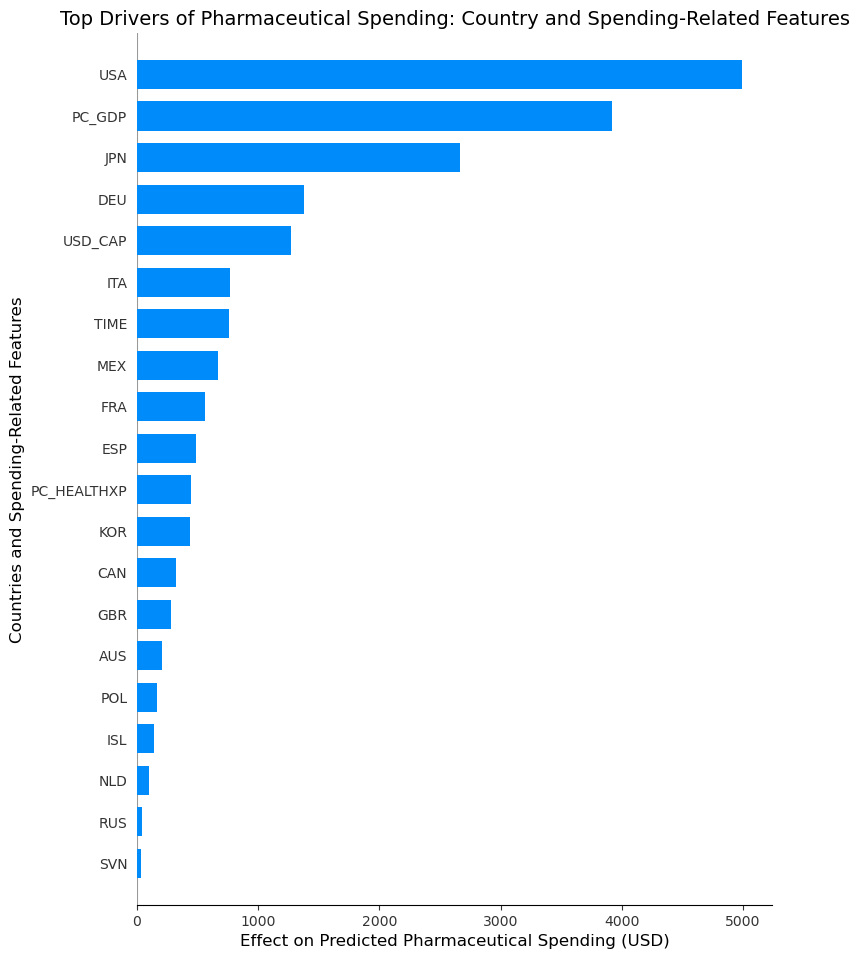

In [86]:
import shap
import matplotlib.pyplot as plt
import os

# === 1. Extract and Rename Features ===
preprocessor = grid_rf.best_estimator_.named_steps["preprocessing"]

try:
    feature_names = preprocessor.get_feature_names_out()
except AttributeError:
    numerical_features = ["Year", "Percentage Health Expenditure"]
    categorical_features = ["Country"]
    feature_names = numerical_features + list(
        preprocessor.named_transformers_["cat"]
        .named_steps["onehot"]
        .get_feature_names_out(categorical_features)
    )

# Replace encoded feature names with readable names
readable_feature_names = [
    name.replace("num__", "").replace("cat__LOCATION_", "") for name in feature_names
]

# Remove less relevant features
features_to_exclude = ["Percent GDP", "Per Capita Spending"]
filtered_indices = [
    i for i, name in enumerate(readable_feature_names) if name not in features_to_exclude
]
filtered_feature_names = [readable_feature_names[i] for i in filtered_indices]

# === 2. Transform Test Data ===
X_test_transformed = grid_rf.best_estimator_.named_steps["preprocessing"].transform(X_test)
if hasattr(X_test_transformed, "toarray"):
    X_test_transformed = X_test_transformed.toarray()

# Filter SHAP values and transformed data
filtered_shap_values = shap.TreeExplainer(
    grid_rf.best_estimator_.named_steps["regressor"]
).shap_values(X_test_transformed)[:, filtered_indices]
filtered_X_test_transformed = X_test_transformed[:, filtered_indices]

# === 3. Create SHAP Summary Plot with Revised Axes ===
plt.figure(figsize=(10, 6))  # Adjust figure size for readability
shap.summary_plot(
    filtered_shap_values,
    filtered_X_test_transformed,
    feature_names=filtered_feature_names,
    plot_type="bar",  # Bar plot for better readability
    show=False
)

# Customize axes for specific context
plt.xlabel("Effect on Predicted Pharmaceutical Spending (USD)", fontsize=12)
plt.ylabel("Countries and Spending-Related Features", fontsize=12)
plt.title("Top Drivers of Pharmaceutical Spending: Country and Spending-Related Features", fontsize=14)
plt.gca().tick_params(axis="both", which="major", labelsize=10)

# Save the updated plot
summary_plot_path = "./reports/shap_summary_plot_revised_axes.png"
plt.savefig(summary_plot_path, bbox_inches="tight")
print(f"Updated SHAP summary plot saved to '{summary_plot_path}'")


### **SHAP Plot Analysis**

### Key Insights from Feature Importance:

- **USA** is the biggest driver of pharmaceutical spending, reflecting its large healthcare expenditure.
- **PC_GDP** (percent of GDP on health) significantly influences spending, with higher allocations leading to increased spending.
- **JPN** (Japan) and **DEU** (Germany) follow closely, indicating their significant role in global pharmaceutical spending.
- Other key contributors include **ITA** (Italy), **TIME** (year), and **MEX** (Mexico), with slightly smaller impacts.
- **FRA**, **ESP**, and **PC_HEALTHXP** (percent of health expenditure) further influence the predictions.
- The plot excludes features like **PC_GDP**, **USD_CAP**, and **PC_HEALTHXP** from the final contribution analysis, focusing on country-specific and time-related factors.

Overall, the data shows that wealthier and more healthcare-focused countries contribute the most to global pharmaceutical spending.

